# Machine Translation

English-German Translation

# 1)- Importing key modules

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# What's life without style :). So, let's add style to our dataframes
#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

In [0]:
import pandas as pd 
import string 
import pickle
from pickle import dump
from pickle import load
from string import digits
import re 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from numpy import array, argmax, random, take 
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.set_option('display.max_colwidth', 200)

In [4]:
from keras.models import Model
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Embedding,Input,RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint 
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model 
from keras import optimizers 

Using TensorFlow backend.


In [5]:
!  pip install version_information

  Created wheel for version-information: filename=version_information-1.0.3-cp36-none-any.whl size=3880 sha256=f80d6198f11f19324bb24ce3d49bc7b5011a81224c71c1c63783cdda74c23891
  Stored in directory: /root/.cache/pip/wheels/1f/4c/b3/1976ac11dbd802723b564de1acaa453a72c36c95827e576321
Successfully built version-information


In [6]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas,re,sklearn, matplotlib,keras

Software versions
Python 3.6.8 64bit [GCC 8.0.1 20180414 (experimental) [trunk revision 259383]
IPython 5.5.0
OS Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
pandas 0.24.2
re 2.2.1
sklearn 0.21.3
matplotlib 3.0.3
keras 2.2.5
Tue Sep 10 18:09:04 2019 UTC

# 2)- Reading Dataset

In [0]:
lines= pd.read_pickle('data_2015.pkl')

In [8]:
lines.shape

(2169, 2)

In [9]:
lines.head()

,eng,ger
0,unk and unk prime unk unk in unk,die premierminister unk und unk unk sich in unk
1,unk new prime minister unk unk is meeting his unk unk unk unk in unk to unk economic and security unk on his first major foreign unk since unk unk election,unk unk premierminister unk unk unk bei seinem ersten unk unk seit seinem unk im mai seinen unk unk unk unk in unk um unk und unk unk zu unk
2,mr unk is on a unk unk to unk to unk economic unk with the third largest economy in the world,herr unk unk sich auf einer unk unk nach unk um die wirtschaftlichen unk mit der unk unk der welt zu unk
3,high on the unk are plans for unk unk unk,plane fur eine unk unk unk stehen ganz oben auf der unk
4,unk is also unk unk for a deal on unk unk between the two unk,berichten zufolge hofft unk daruber hinaus auf einen unk zur unk zwischen den beiden unk


As this is big data and I have a poor old computing machine. So, I ll use smaller sample. It got to be random to avoid sample biaseness

In [10]:
lines.sample(15)

,eng,ger
1502,unk unk wanted,unk unk unk
1744,and that goes for all generations,und das unk durch die generationen
669,im unk that way,ich bin da ein bisschen unk
362,unk unk tv series and parts in films unk his next unk but after his bbc series unk he thought what are you going to do next unk because it all unk a bit like youre unk time or youre unk going unk,unk unk unk und unk unk sein nachstes unk aber nach seiner unk unk dachte er sich was unk du als nachstes unk weil es sich alles so unk als unk du nur die zeit unk oder unk ein wenig auf der unk
2016,he unk it to provide a unk for his reform unk in unk,er erwartet davon auch einen unk fur sein unk in unk
53,unk rights activists unk the decision the latest in a unk of unk against similar unk saying it would give doctors more time to unk hospital privileges,unk unk die entscheidung die unk in einer reihe von unk gegen unk manahmen und sagten dass arzte so mehr zeit unk um unk zu unk
1447,unk are unk their anniversary,unk unk ihr unk
1100,i didnt think i was going to be able to drive all the way home,ich unk die unk nach hause nicht mehr zu schaffen
395,i love being in a unk room,ich liebe es in einem unk zu sein
1652,if the state unk to unk revenue unk in the coming year the law could unk the states business income tax rate as low as percent by,wenn der staat weiterhin seine unk im kommenden jahr erreicht konnte dieses gesetz den unk des staates bis bis auf prozent unk


In [0]:
#lines = lines[:5000]

# 3)- Quick Preprocessing

In [0]:
# Lowercase all characters
lines.eng=lines.eng.apply(lambda x: x.lower())
lines.ger=lines.ger.apply(lambda x: x.lower())

In [0]:
# Remove quotes
lines.eng=lines.eng.apply(lambda x: re.sub("'", '', x))
lines.ger=lines.ger.apply(lambda x: re.sub("'", '', x))

In [0]:
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
lines.eng=lines.eng.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines.ger=lines.ger.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [0]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
lines.eng=lines.eng.apply(lambda x: x.translate(remove_digits))
lines.ger=lines.ger.apply(lambda x: x.translate(remove_digits))

In [0]:
# Remove extra spaces
lines.eng=lines.eng.apply(lambda x: x.strip())
lines.ger=lines.ger.apply(lambda x: x.strip())
lines.eng=lines.eng.apply(lambda x: re.sub(" +", " ", x))
lines.ger=lines.ger.apply(lambda x: re.sub(" +", " ", x))

**Do threshold here**

In [0]:
# Add start and end tokens to target sequences. I am not German so , I am doing so for my ease
lines.ger = lines.ger.apply(lambda x : 'START_ '+ x + ' _END')

In [17]:
lines.ger[:5]

0                                                                                                 START_ die premierminister unk und unk unk sich in unk _END
1    START_ unk unk premierminister unk unk unk bei seinem ersten unk unk seit seinem unk im mai seinen unk unk unk unk in unk um unk und unk unk zu unk _END
2                                        START_ herr unk unk sich auf einer unk unk nach unk um die wirtschaftlichen unk mit der unk unk der welt zu unk _END
3                                                                                         START_ plane fur eine unk unk unk stehen ganz oben auf der unk _END
4                                                        START_ berichten zufolge hofft unk daruber hinaus auf einen unk zur unk zwischen den beiden unk _END
Name: ger, dtype: object

In [18]:
lines.sample(10)

,eng,ger
1394,the unk in unk presented unk and unk of the unk of as well as unk made from the unk unk unk unk which was once used to unk up unk,START_ die unk in unk unk unk und unk von den unk unk sowie unk aus der unk der unk die einst die unk unk _END
1848,calculus is selling for used on unk,START_ unk ist unk auf unk fur zu haben _END
239,unk the unk road must be unk into two unk over a unk of about one unk,START_ damit musste die unk strae auf etwa einem kilometer lange unk unk werden _END
1396,in the office of unk unk unk at the state association in unk unk the remains of a roman unk in an industrial estate in north unk,START_ hatte das unk fur unk beim unk unk die unk einer romischen unk im unk unk in unk unk _END
975,they are a big happy family now and alyona and unk are both great kids said a close unk,START_ sie sind jetzt eine groe unk familie und aljona und unk sind unk unk kinder sagt ein unk unk _END
930,in unk of unk condition i am well,START_ unk geht es mir gut _END
490,unk riders are unk in unk with unk riders being put up in unk unk,START_ in unk unk werden die teilnehmer in unk unk in unk ii in unk _END
1624,a unk economy means more unk higher sales and new unk,START_ eine erholung der wirtschaft bedeutet mehr unk mehr unk und neue unk _END
1860,unk unk if you unk to return the book unk can actually unk the cost of buying it new,START_ unk unk wenn sie das buch nicht unk konnen die unk den preis eines neuen unk sogar unk _END
158,and wouldnt it be unk if we could set our home unk to unk on just before we get back from the office,START_ und ware es nicht unk wenn wir vom buro aus die unk auf unsere unk unk _END


### 3a)- Vocab Size

In [0]:
# Vocabulary of English
all_eng_words=set()
for eng in lines.eng:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)
# Vocabulary of German 
all_german_words=set()
for ger in lines.ger:
    for word in ger.split():
        if word not in all_german_words:
            all_german_words.add(word)

In [20]:
# Max Length of source sequence
import numpy as np
lenght_list=[]
for l in lines.eng:
    lenght_list.append(len(l.split(' ')))
max_length_src = np.max(lenght_list)
max_length_src

71

In [21]:
# Max Length of target sequence
lenght_list=[]
for l in lines.ger:
    lenght_list.append(len(l.split(' ')))
max_length_tar = np.max(lenght_list)
max_length_tar

73

In [22]:
lines['word_eng'] = lines['eng'].apply(lambda x: len(str(x).split(" ")))
lines[['eng','word_eng']].head()

,eng,word_eng
0,unk and unk prime unk unk in unk,8
1,unk new prime minister unk unk is meeting his unk unk unk unk in unk to unk economic and security unk on his first major foreign unk since unk unk election,31
2,mr unk is on a unk unk to unk to unk economic unk with the third largest economy in the world,21
3,high on the unk are plans for unk unk unk,10
4,unk is also unk unk for a deal on unk unk between the two unk,15


In [23]:
# adding +2 due to adding of START and END
lines['word_ger'] = lines['ger'].apply(lambda x: len(str(x).split(" ")))
lines[['ger','word_ger']].head()

,ger,word_ger
0,START_ die premierminister unk und unk unk sich in unk _END,11
1,START_ unk unk premierminister unk unk unk bei seinem ersten unk unk seit seinem unk im mai seinen unk unk unk unk in unk um unk und unk unk zu unk _END,32
2,START_ herr unk unk sich auf einer unk unk nach unk um die wirtschaftlichen unk mit der unk unk der welt zu unk _END,24
3,START_ plane fur eine unk unk unk stehen ganz oben auf der unk _END,14
4,START_ berichten zufolge hofft unk daruber hinaus auf einen unk zur unk zwischen den beiden unk _END,17


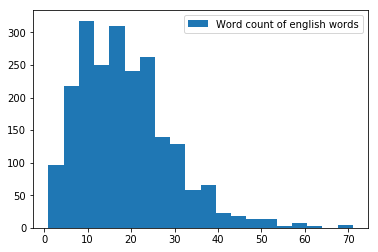

In [24]:
words_eng=lines['word_eng']
plt.hist(words_eng, bins=20, label="Word count of english words") 
plt.legend() 
plt.show()

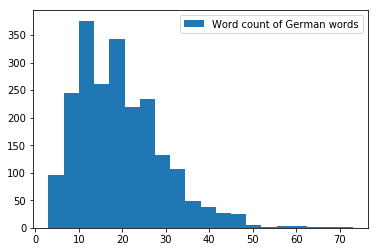

In [25]:
words_ger=lines['word_ger']
plt.hist(words_ger, bins=20, label="Word count of German words") 
plt.legend() 
plt.show()

### 3b)-Words' frequency

In [26]:
# let’s check the 10 most frequently occurring words in our English text data
freq_eng = pd.Series(' '.join(lines['eng']).split()).value_counts()[:10]
freq_eng

unk     9455
the     2643
to      1115
of      1078
in      1015
and      953
a        903
for      423
that     410
is       400
dtype: int64

In [27]:
freq_ger = pd.Series(' '.join(lines['ger']).split()).value_counts()[:12]
freq_ger

unk       11732
START_     2169
_END       2169
die        1256
der        1177
und         940
in          790
den         453
von         433
das         426
zu          406
fur         333
dtype: int64

As we have start and end so, I did check 12 so that we get idea of most fequent words

**How about least occuring words**

In [28]:
less_freq_eng = pd.Series(' '.join(lines['eng']).split()).value_counts()[-10:]
less_freq_eng

founded         5
spread          5
rapid           5
spent           5
nice            5
calculus        5
intelligence    5
remembers       5
goods           5
points          5
dtype: int64

In [29]:
less_freq_ger = pd.Series(' '.join(lines['ger']).split()).value_counts()[-10:]
less_freq_ger

deal                   5
stoff                  5
allem                  5
unternehmenssteuern    5
gewerkschaft           5
generationen           5
november               5
gleichen               5
geismar                5
kampfe                 5
dtype: int64

### 3a)- Defining input and target

In [30]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_german_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_german_words)
num_encoder_tokens, num_decoder_tokens

(1211, 991)

In [31]:
num_decoder_tokens += 1 # For zero padding
num_decoder_tokens

992

In [0]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [0]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [34]:
print(reverse_input_char_index)

{1: 'a', 2: 'abandoned', 3: 'abbott', 4: 'able', 5: 'abortions', 6: 'about', 7: 'above', 8: 'access', 9: 'according', 10: 'account', 11: 'accused', 12: 'across', 13: 'act', 14: 'action', 15: 'actions', 16: 'activists', 17: 'actually', 18: 'addition', 19: 'adelaide', 20: 'admitting', 21: 'affected', 22: 'africa', 23: 'after', 24: 'again', 25: 'against', 26: 'age', 27: 'ago', 28: 'agreed', 29: 'agreement', 30: 'ahead', 31: 'ailinn', 32: 'air', 33: 'airport', 34: 'all', 35: 'allow', 36: 'almost', 37: 'alone', 38: 'along', 39: 'already', 40: 'also', 41: 'although', 42: 'always', 43: 'alyona', 44: 'am', 45: 'amazon', 46: 'america', 47: 'american', 48: 'americans', 49: 'among', 50: 'amount', 51: 'an', 52: 'and', 53: 'andrew', 54: 'anniversary', 55: 'announced', 56: 'announcement', 57: 'annual', 58: 'another', 59: 'answer', 60: 'any', 61: 'anyone', 62: 'apollo', 63: 'april', 64: 'are', 65: 'area', 66: 'areas', 67: 'arm', 68: 'army', 69: 'around', 70: 'as', 71: 'asbestos', 72: 'asked', 73: 'as

In [35]:
print(reverse_target_char_index)

{1: 'START_', 2: '_END', 3: 'ab', 4: 'abbott', 5: 'abend', 6: 'aber', 7: 'abtreibungen', 8: 'adelaide', 9: 'ailinn', 10: 'aljona', 11: 'all', 12: 'alle', 13: 'allein', 14: 'allem', 15: 'allen', 16: 'aller', 17: 'allerdings', 18: 'alles', 19: 'als', 20: 'also', 21: 'alt', 22: 'alten', 23: 'alter', 24: 'altere', 25: 'am', 26: 'amazon', 27: 'amerikanischen', 28: 'an', 29: 'andere', 30: 'anderem', 31: 'anderen', 32: 'anders', 33: 'andrew', 34: 'anfang', 35: 'angaben', 36: 'angeblich', 37: 'angeboten', 38: 'angekundigt', 39: 'angst', 40: 'anklage', 41: 'anstieg', 42: 'anteil', 43: 'apollo', 44: 'april', 45: 'arbeit', 46: 'arbeiten', 47: 'arbeiter', 48: 'arbeitete', 49: 'arbeitsplatz', 50: 'armee', 51: 'art', 52: 'arzt', 53: 'arzte', 54: 'arzten', 55: 'asbest', 56: 'asbestkontakt', 57: 'auch', 58: 'auer', 59: 'auerdem', 60: 'auf', 61: 'aufgabe', 62: 'aufgenommen', 63: 'aufgerufen', 64: 'aufgrund', 65: 'aufhoren', 66: 'augen', 67: 'august', 68: 'aus', 69: 'ausbildung', 70: 'ausgaben', 71: 'au

### 3b)-Train - Test Split

For validation

In [36]:
X, y = lines.eng, lines.ger #X being input, y being target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((1735,), (434,))

**Save the train and test dataframes for reproducing the results later, as they are shuffled**

In [0]:
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

In [0]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

# 4)-Encoder - Decoder Model Architecture

In [0]:
latent_dim = 50

In [40]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [42]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
#from IPython.display import Image
#Image(retina=True, filename='train.png')

In [0]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 15

In [45]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 50)     60550       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 50)     49600       input_2[0][0]                    
____________________________________________________________________________________________

In [46]:
model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)


Epoch 1/15
13/13 [==============================] - 9s 681ms/step - loss: 6.5216 - acc: 0.2631 - val_loss: 5.6383 - val_acc: 0.2989
Epoch 2/15
13/13 [==============================] - 4s 271ms/step - loss: 5.1901 - acc: 0.2954 - val_loss: 4.8398 - val_acc: 0.2927
Epoch 3/15
13/13 [==============================] - 4s 274ms/step - loss: 4.6318 - acc: 0.2959 - val_loss: 4.5492 - val_acc: 0.2949
Epoch 4/15
13/13 [==============================] - 4s 273ms/step - loss: 4.4850 - acc: 0.2973 - val_loss: 4.5317 - val_acc: 0.2922
Epoch 5/15
13/13 [==============================] - 4s 273ms/step - loss: 4.4619 - acc: 0.2962 - val_loss: 4.4609 - val_acc: 0.2989
Epoch 6/15
13/13 [==============================] - 4s 272ms/step - loss: 4.4652 - acc: 0.2936 - val_loss: 4.4981 - val_acc: 0.2927
Epoch 7/15
13/13 [==============================] - 4s 273ms/step - loss: 4.4485 - acc: 0.2948 - val_loss: 4.4708 - val_acc: 0.2949
Epoch 8/15
13/13 [==============================] - 4s 273ms/step - loss: 4

In [0]:
# save model
model.save_weights('translate.h5')

In [0]:
model.load_weights('translate.h5')

# Inference Setup

In [0]:
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

# Decode sample sequeces

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']
  

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

# Evaluation on Train Dataset

In [0]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [52]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: the organization went unk with no issues and there were no unk unk unk unk unk unk with unk to the event
Actual German Translation:  die organisation unk ohne probleme und es gab keine unk unk unk unk unk ein unk unk dieser unk 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


In [53]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: it was not only the unk that unk unk unk in the unk at the park during unk first roman day
Actual German Translation:  nicht nur die unk standen unk im unk beim ersten unk unk im unk 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


In [54]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: the unk and unk by unk unk song unk unk political unk and unk is really more a statement of unk than it is a unk
Actual German Translation:  es ist unk mehr unk unk als unk was unk unk unk unk unk unk unk in unk und unk auf seiten zu unk gebracht hat 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


# Evaluation on Validation Dataset

In [0]:
val_gen = generate_batch(X_test, y_test, batch_size = 1)
k=-1

In [56]:
k+=1
(input_seq, actual_output), _ = next(val_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual German Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: and he has been unk honest throughout from unk as a unk school unk to unk and unk he has left unk of his human unk unk
Actual German Translation:  und er ist dabei unk ehrlich von der unk als unk bis zum unk und unk lasst er keine unk unk aus 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


In [57]:
k+=1
(input_seq, actual_output), _ = next(val_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual German Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: ebola the epidemic is unk unk on west unk economy
Actual German Translation:  unk die unk unk unk wirtschaft 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk


In [58]:
k+=1
(input_seq, actual_output), _ = next(val_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual German Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: unk piffl the deputy chairman of castle friends said himself that he was very unk about the call
Actual German Translation:  unk piffl unk vorsitzender der burgfreunde hat sich nach eigenen angaben uber den unk sehr unk 
Predicted German Translation:  unk unk unk unk unk unk unk unk unk unk unk unk
